/var/folders/cc/3rg_c9bd0_3_5zr4j400w21m0000gn/T/ipykernel_39767/3728931806.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()  # show plot in notebook


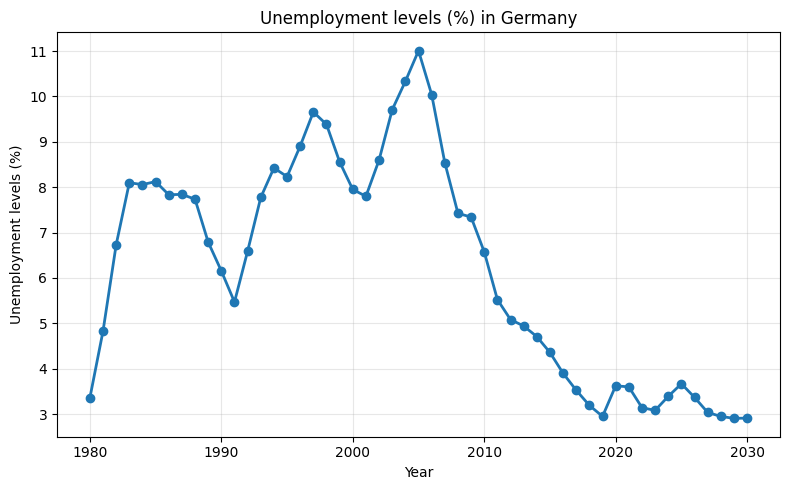

In [24]:


%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Add the Functions folder to Python path
sys.path.append("../Functions")  # adjust if needed

from functions import filter_data, plot_indicator

#https://docs.google.com/spreadsheets/d/1BJYCRpalLJLO5wHX488KBdcf-26NAc0nTkngKodzUYA/export?format=csv
df_url = "https://docs.google.com/spreadsheets/d/1E0lyCSxlC0ajNtzjpWo17TX5DEeEjd33E-j6c7fOBcg/export?format=csv"
df = pd.read_csv(df_url)
df.columns = [c.strip() for c in df.columns]

# ----------------------------
# Filter and plot germany
# ----------------------------
df_germany_unemp = filter_data(df, "Germany", "Unemployment levels (%)")
fig = plot_indicator(df_germany_unemp, "Germany", "Unemployment levels (%)")
fig.show()  # show plot in notebook






/var/folders/cc/3rg_c9bd0_3_5zr4j400w21m0000gn/T/ipykernel_39767/1348124582.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


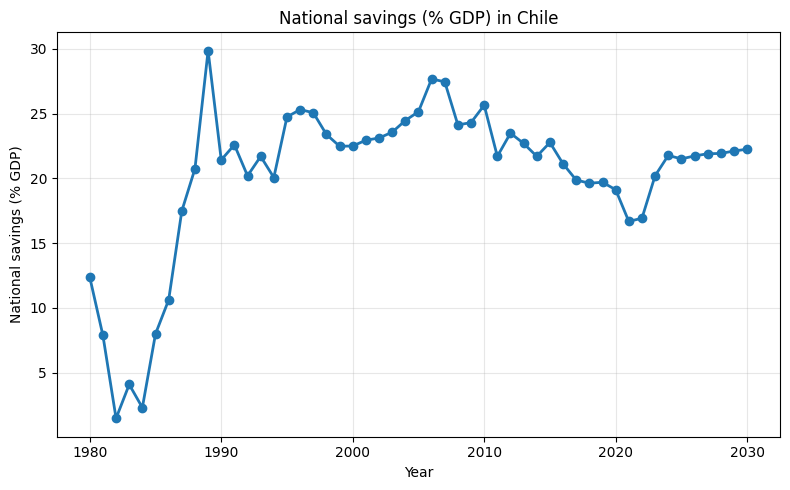

In [25]:
df_chile_savings = filter_data(df, "Chile", "National savings (% GDP)")
fig = plot_indicator(df_chile_savings, "Chile", "National savings (% GDP)")
fig.show()

In [26]:
def plot_indicator_bar(df_filtered, country, indicator):
    """
    Creates a bar chart from a filtered dataframe.
    Returns a Matplotlib figure object.
    Works in both Jupyter and Streamlit.
    """
    fig, ax = plt.subplots(figsize=(8, 5))

    if df_filtered.empty:
        ax.text(0.5, 0.5, "No data available",
                ha="center", va="center", fontsize=12)
        ax.set_axis_off()
        return fig

    # --- KEY CHANGE: Use ax.bar() instead of ax.plot() ---
    ax.bar(df_filtered["Year"], df_filtered["Value"], color='skyblue', edgecolor='black')
    
    # Optional: Rotate x-axis labels for better readability if years are crowded
    ax.set_xticks(df_filtered["Year"]) # Ensure ticks are only on the years available
    ax.tick_params(axis='x', rotation=45) 
    # --- END KEY CHANGE ---

    ax.set_title(f"{indicator} in {country}")
    ax.set_xlabel("Year")
    ax.set_ylabel(indicator)
    ax.grid(axis='y', alpha=0.3) # Typically bar charts only need horizontal grid lines

    plt.tight_layout()
    return fig

In [27]:
df_GDP = df[df["Indicator Name"].str.contains("GDP per capita", case=False, na=False)]

#df_GDP = df[df["Indicator Name"]== "GDP per capita"]
df_GDP.head(29)

,Country Name,Indicator Name,Year,Value
2,United States,GDP per capita,1980,12552.943
6,Denmark,GDP per capita,1980,13824.640
7,Germany,GDP per capita,1980,11150.445
13,Japan,GDP per capita,1980,9671.861
20,South Africa,GDP per capita,1980,3074.684
23,Costa Rica,GDP per capita,1980,2108.750
24,Chile,GDP per capita,1980,2598.159
31,Indonesia,GDP per capita,1980,673.239
33,Ghana,GDP per capita,1980,3239.454
36,"Poland, Republic of",GDP per capita,1980,1600.046


In [28]:
df["Country Name"].unique()

array(['United States', 'Germany', 'Denmark', 'Japan', 'Indonesia',
       'South Africa', 'Costa Rica', 'Chile', 'Ghana',
       'Poland, Republic of', 'China', "Cote d'Ivoire", 'Poland'],
      dtype=object)

In [47]:
all_countries=['United States', 'Germany', 'Denmark', 'Japan', 'Indonesia',
       'South Africa', 'Costa Rica', 'Chile', 'Ghana',
       'Poland, Republic of', 'China', "Cote d'Ivoire", 'Poland']

In [66]:
def plot_two_indicators_2000_2023(df, countries, ind1, ind2):
    # Filter for selected countries and indicators
    df_f = df[df["Country Name"].isin(countries) & 
              df["Indicator Name"].isin([ind1, ind2])]

    # Split by indicator
    df1 = df_f[df_f["Indicator Name"] == ind1]
    df2 = df_f[df_f["Indicator Name"] == ind2]

    # Pivot for plotting
    df1_pivot = df1.pivot(index="Year", columns="Country Name", values="Value")
    df2_pivot = df2.pivot(index="Year", columns="Country Name", values="Value")

    # Align all years across both indicators
    all_years = sorted(set(df1_pivot.index).union(df2_pivot.index))
    df1_pivot = df1_pivot.reindex(all_years)
    df2_pivot = df2_pivot.reindex(all_years)

    # 🔹 Limit to 2000-2023
    df1_pivot = df1_pivot.loc[2000:2023]
    df2_pivot = df2_pivot.loc[2000:2023]

    # Figure
    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Color map (one color per country)
    colors = plt.cm.tab10.colors

    # Plot indicator 1 (solid)
    handles = []
    for i, country in enumerate(countries):
        if country in df1_pivot.columns:
            line, = ax1.plot(
                df1_pivot.index, df1_pivot[country],
                color=colors[i % len(colors)],
                linewidth=2
            )
            handles.append(line)

    ax1.set_ylabel(ind1)
    ax1.set_xlabel("Year")
    ax1.grid(True, linestyle='--', alpha=0.4)

    # Plot indicator 2 (dashed, same color per country)
    ax2 = ax1.twinx()
    for i, country in enumerate(countries):
        if country in df2_pivot.columns:
            ax2.plot(
                df2_pivot.index, df2_pivot[country],
                color=colors[i % len(colors)],
                linestyle="--",
                linewidth=2
            )

    ax2.set_ylabel(ind2)

    # Legend with only country names
    ax1.legend(handles, countries, bbox_to_anchor=(1.15, 1), loc='upper left')

    plt.title(f"{ind1} (solid) and {ind2} (dashed) — {countries} (2000-2023)")
    plt.tight_layout()
    plt.show()



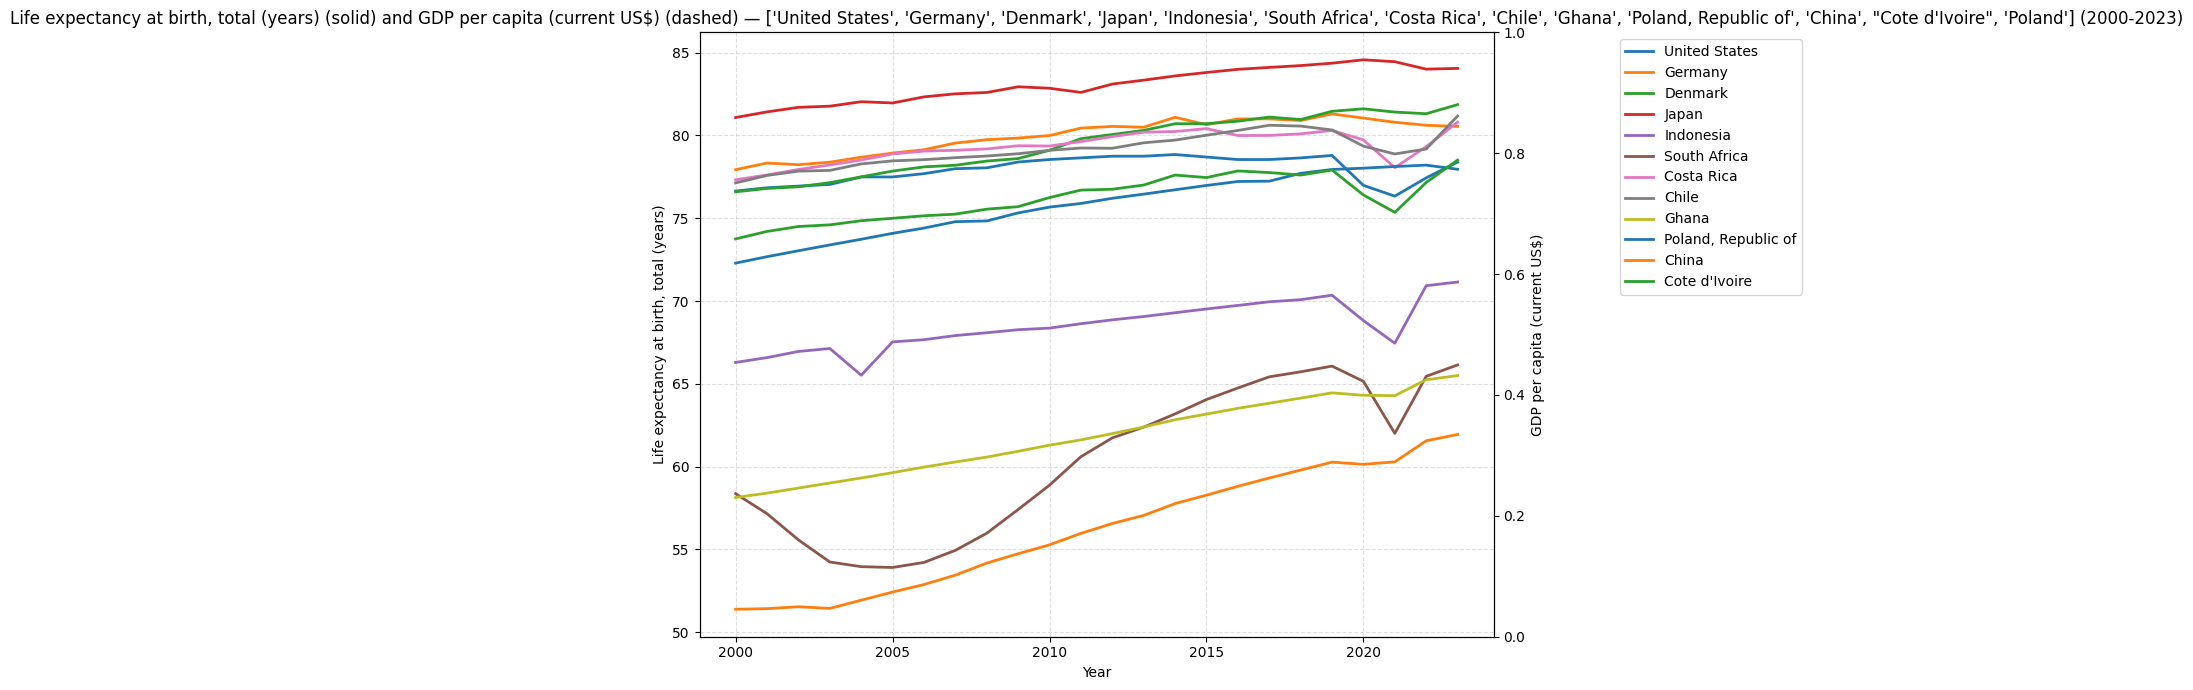

In [68]:
countries_Europe = ["Poland", "Germany", "Denmark"]
countries_America = ["United States", "Costa Rica", "Chile"]

ind1 = "Life expectancy at birth, total (years)"
ind2 = "GDP per capita (current US$)"

plot_two_indicators_2000_2023(df, all_countries, ind1, ind2)

In [69]:
import matplotlib.pyplot as plt

def plot_two_indicators_long(df, countries, ind1, ind2):
    # Filter for selected countries, indicators, and years 2000-2023
    df_f = df[
        df["Country Name"].isin(countries) &
        df["Indicator Name"].isin([ind1, ind2]) &
        df["Year"].between(2000, 2023)
    ]

    # Set up figure
    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Color map for countries
    colors = plt.cm.tab10.colors

    # Plot life expectancy (solid) on left axis
    handles = []
    for i, country in enumerate(countries):
        df_plot = df_f[(df_f["Country Name"]==country) & (df_f["Indicator Name"]==ind1)]
        line, = ax1.plot(df_plot["Year"], df_plot["Value"], 
                         color=colors[i % len(colors)],
                         linewidth=2)
        handles.append(line)
    ax1.set_xlabel("Year")
    ax1.set_ylabel(ind1)
    ax1.grid(True, linestyle="--", alpha=0.4)

    # Plot GDP per capita (dashed) on right axis
    ax2 = ax1.twinx()
    for i, country in enumerate(countries):
        df_plot = df_f[(df_f["Country Name"]==country) & (df_f["Indicator Name"]==ind2)]
        ax2.plot(df_plot["Year"], df_plot["Value"], 
                 color=colors[i % len(colors)],
                 linestyle="--",
                 linewidth=2)
    ax2.set_ylabel(ind2)

    # Legend with only country names
    ax1.legend(handles, countries, bbox_to_anchor=(1.15,1), loc='upper left')

    plt.title(f"{ind1} (solid) and {ind2} (dashed) — {countries} (2000-2023)")
    plt.tight_layout()
    plt.show()


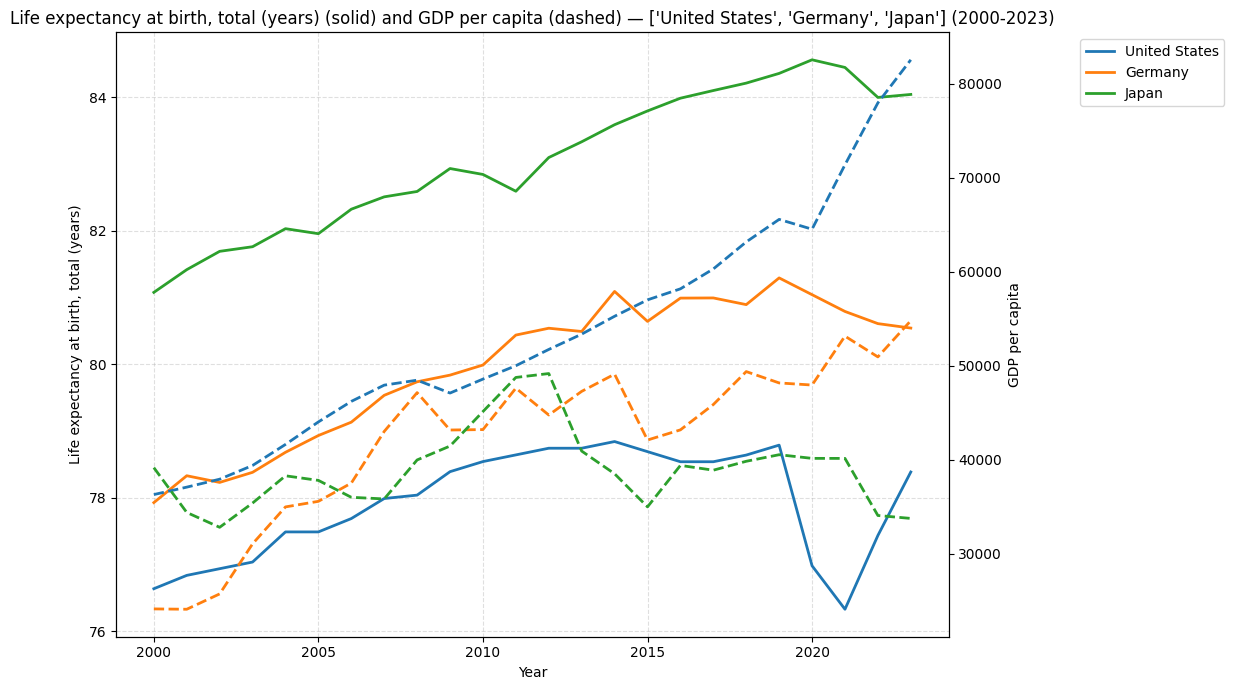

In [73]:
countries = ["United States", "Germany", "Japan"]
ind1 = "Life expectancy at birth, total (years)"
ind2 = "GDP per capita"

plot_two_indicators_long(df, countries, ind1, ind2)


In [ ]:
df

,Country Name,Indicator Name,Year,Value
0,United States,National savings (% GDP),1980,22.059
1,United States,Unemployment levels (%),1980,7.175
2,United States,GDP per capita,1980,12552.943
3,United States,"Inflation (CPI, %))",1980,86.750
4,Germany,Unemployment levels (%),1980,3.359


In [ ]:
mask = df['Indicator Name'] = ''

In [72]:
df['Indicator Name'].value_counts()

Indicator Name
Urban population (% of total population)                               540
Gini index                                                             540
Life expectancy at birth, total (years)                                540
Current health expenditure (% of GDP)                                  540
Poverty headcount ratio at national poverty lines (% of population)    540
Birth rate, crude (per 1,000 people)                                   540
National savings (% GDP)                                               510
GDP per capita                                                         510
Inflation (CPI, %))                                                    510
Unemployment levels (%)                                                459
Name: count, dtype: int64